In this assigment, we going to scrap a site and draw insights from it 

* using the url above webscrap the financial website and load it in a pandas Dataframe 
* load it in df and draw out at least 3 insights from the data 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [156]:
url = "https://www.worlddata.info/africa/nigeria/inflation-rates.php"
r = requests.get(url)
content = BeautifulSoup(r.content, 'html.parser')
#content

In [157]:
for rows in content.find_all('tr')[0]:
    print(rows.text)

Year
Nigeria
Ø EU
Ø USA
Ø World


In [158]:
header = []
for rows in content.find_all('tr')[0]:
    header.append(rows.text)
df = pd.DataFrame(columns = header)

table_rows = content.find_all('tr')[:1]
list_row = []
for i in range(3,len(table_rows)):
    row_level = table_rows[i]
    row_level_list = []
    for rows in row_level:
        row_level_list.append(rows.text)
    list_row.append(row_level_list)
for final_row in list_row:
    df.loc[:, -1] = final_row
    df.iloc[df.shape[0:]] = final_row

In [159]:
df

,Year,Nigeria,Ø EU,Ø USA,Ø World


In [160]:
list_row = []
for header in content.find_all('th'):
    list_row.append(header.text)
    
df = pd.DataFrame(columns= list_row)
row_team = []
tr = content.find_all('tr')
list_of_rows = []
for table_row in range(1,len(tr)):
    list_for_each_row = []
    tr_small = tr[table_row]
    for row in tr_small:
        list_for_each_row.append(row.text)
        list_of_rows.append(list_for_each_row)
        
for i in list_of_rows:
    df.loc[len(df)] = i

In [161]:
df.head()

,Year,Nigeria,Ø EU,Ø USA,Ø World
0,2021,16.95 %,2.55 %,4.70 %,3.42 %
1,2021,16.95 %,2.55 %,4.70 %,3.42 %
2,2021,16.95 %,2.55 %,4.70 %,3.42 %
3,2021,16.95 %,2.55 %,4.70 %,3.42 %
4,2021,16.95 %,2.55 %,4.70 %,3.42 %


In [162]:
# checking for the shape of my data
df.shape

(310, 5)

In [163]:
# checking for datatypes
df.dtypes

Year       object
Nigeria    object
Ø EU       object
Ø USA      object
Ø World    object
dtype: object

In [164]:
# checking the column
df.columns

Index(['Year', 'Nigeria', 'Ø EU', 'Ø USA', 'Ø World'], dtype='object')

In [165]:
# renaming the column name to remove Ø sign
df.rename(columns= {'Ø EU': 'EU',
                   'Ø USA': 'USA',
                  'Ø World': 'World'}, inplace=True)

In [166]:
pd.set_option('display.max_rows', None) 
df.head(5)

,Year,Nigeria,EU,USA,World
0,2021,16.95 %,2.55 %,4.70 %,3.42 %
1,2021,16.95 %,2.55 %,4.70 %,3.42 %
2,2021,16.95 %,2.55 %,4.70 %,3.42 %
3,2021,16.95 %,2.55 %,4.70 %,3.42 %
4,2021,16.95 %,2.55 %,4.70 %,3.42 %


In [167]:
df.tail(5) # there are NA values in the 'World' column

,Year,Nigeria,EU,USA,World
305,1960,5.44 %,1.74 %,1.46 %,n/a
306,1960,5.44 %,1.74 %,1.46 %,n/a
307,1960,5.44 %,1.74 %,1.46 %,n/a
308,1960,5.44 %,1.74 %,1.46 %,n/a
309,1960,5.44 %,1.74 %,1.46 %,n/a


In [169]:
# saving my dataset 
df.to_csv("C:/Users/STUTERN/Desktop/Intermediate_project/week7/nigeria_inflation_rate.csv") 

In [170]:
df.World.value_counts().head()

n/a       100
2.19 %     10
4.82 %     10
7.15 %      5
9.15 %      5
Name: World, dtype: int64

In [3]:
df1 = pd.read_csv("C:/Users/STUTERN/Desktop/Intermediate_project/week7/nigeria_inflation_rate.csv", index_col=0)

In [4]:
df1.tail(5)

,Year,Nigeria,EU,USA,World
305,1960,5.44 %,1.74 %,1.46 %,NaN
306,1960,5.44 %,1.74 %,1.46 %,NaN
307,1960,5.44 %,1.74 %,1.46 %,NaN
308,1960,5.44 %,1.74 %,1.46 %,NaN
309,1960,5.44 %,1.74 %,1.46 %,NaN


In [6]:
df1["World"].fillna("2.19 %", inplace = True)

In [7]:
df1.tail()

,Year,Nigeria,EU,USA,World
305,1960,5.44 %,1.74 %,1.46 %,2.19 %
306,1960,5.44 %,1.74 %,1.46 %,2.19 %
307,1960,5.44 %,1.74 %,1.46 %,2.19 %
308,1960,5.44 %,1.74 %,1.46 %,2.19 %
309,1960,5.44 %,1.74 %,1.46 %,2.19 %


In [8]:
#Removing the % sign from the values
cols = ['Nigeria','EU','USA','World']
df1[cols] = df1[cols].replace({'%':''}, regex=True)

In [9]:
df1.head()

,Year,Nigeria,EU,USA,World
0,2021,16.95,2.55,4.70,3.42
1,2021,16.95,2.55,4.70,3.42
2,2021,16.95,2.55,4.70,3.42
3,2021,16.95,2.55,4.70,3.42
4,2021,16.95,2.55,4.70,3.42


In [10]:
df1.shape

(310, 5)

In [11]:
df1.duplicated(keep='first').sum() #the years are duplicated which will affect the insight

248

In [12]:
df1.drop_duplicates(keep='first', inplace=True)

In [13]:
df1.shape

(62, 5)

In [15]:
df1= df1.astype(float)

In [16]:
df1['Year']= df1['Year'].astype(int)

In [17]:
df1.dtypes

Year         int32
Nigeria    float64
EU         float64
USA        float64
World      float64
dtype: object

#### Data Exploration
###### Draw out five insights from the data


**1. Which year has the highest and lowest inflation rate in Nigeria**

In [67]:
df1.head(20)

,Year,Nigeria,EU,USA,World
0,2021,16.95,2.55,4.70,3.42
5,2020,13.25,0.50,1.23,1.92
10,2019,11.40,1.63,1.81,2.19
15,2018,12.09,1.74,2.44,2.44
20,2017,16.52,1.43,2.13,2.19
25,2016,15.68,0.18,1.26,1.55
30,2015,9.01,-0.06,0.12,1.43
35,2014,8.06,0.20,1.62,2.35
40,2013,8.48,1.22,1.46,2.62
45,2012,12.22,2.66,2.07,3.73


In [66]:
df1[['Year','Nigeria']][20:30]

,Year,Nigeria
100,2001,18.87
105,2000,6.93
110,1999,6.62
115,1998,10.00
120,1997,8.53
125,1996,29.27
130,1995,72.84
135,1994,57.03
140,1993,57.17
145,1992,44.59


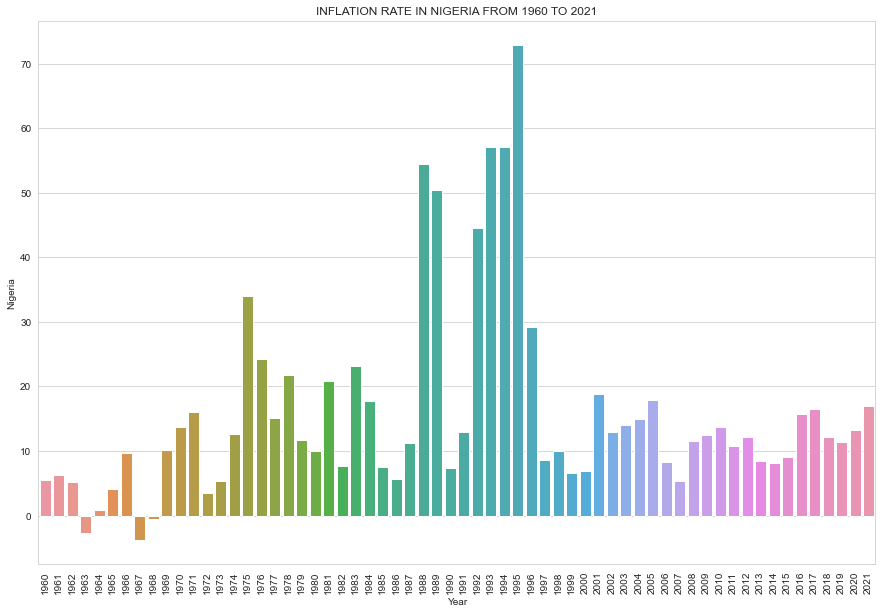

In [47]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style('whitegrid')
sns.barplot(x= df1.Year, y= df1['Nigeria'], ci=None, estimator=sum)
plt.title('INFLATION RATE IN NIGERIA FROM 1960 TO 2021')
plt.xticks(rotation='vertical')
plt.show()

1995 had the highest infaltion rate of 72.84%. While 1967 has the lowest rate of -3.73%. 

**2. Compare the inflation rate between Nigeria and EU**


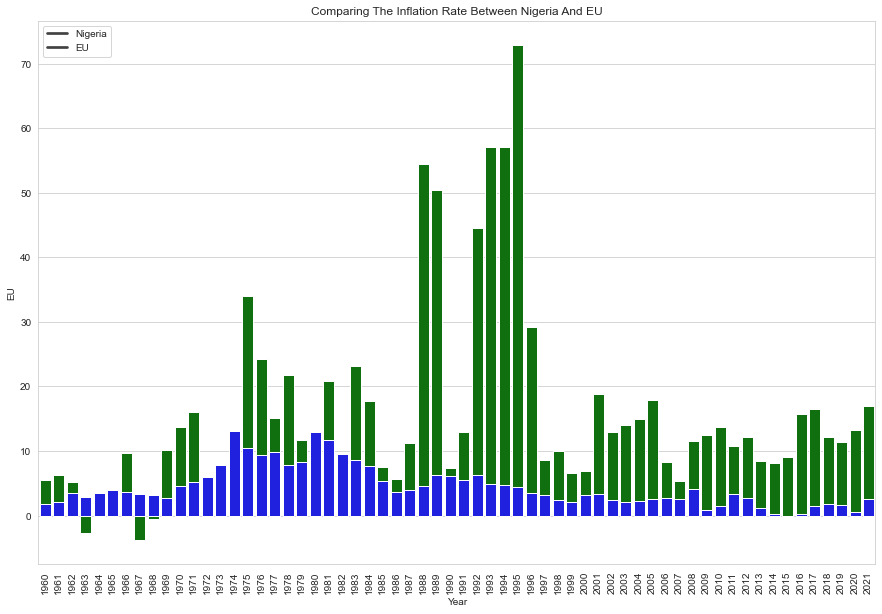

In [49]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=df1, x='Year', y='Nigeria', color='green')
sns.barplot(data=df1, x='Year', y='EU', color='blue')
plt.legend(['Nigeria','EU'], loc= 'upper left')
plt.title('Comparing The Inflation Rate Between Nigeria And EU')
plt.xticks(rotation='vertical')
plt.show();

It's actually clear that Nigeria has a very high inflation rate compare to EU

**3. Compare the inflation rate between Nigeria and USA**

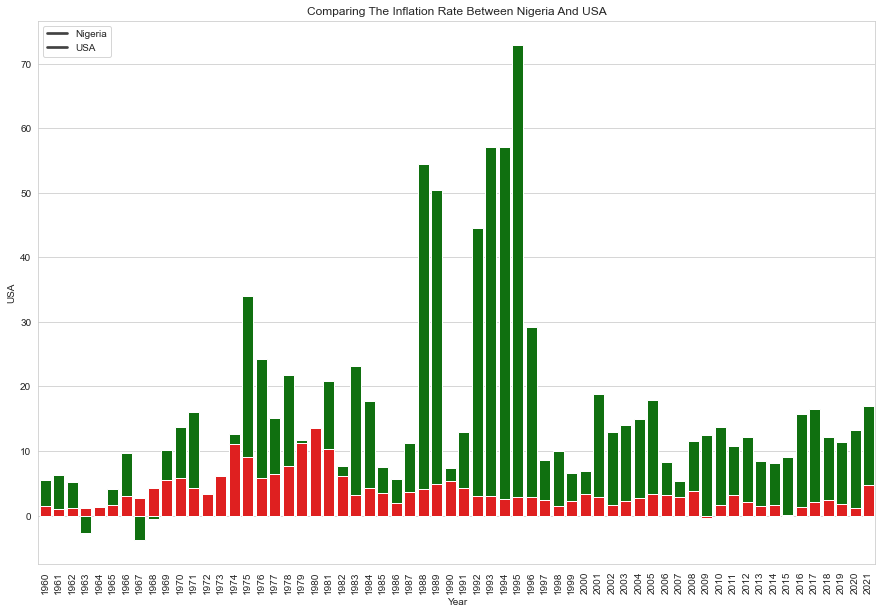

In [55]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=df1, x='Year', y='Nigeria', color='green')
sns.barplot(data=df1, x='Year', y='USA', color='red')
plt.legend(['Nigeria','USA'], loc= 'upper left')
plt.title('Comparing The Inflation Rate Between Nigeria And USA')
plt.xticks(rotation='vertical')
plt.show();

It's actually clear that Nigeria has a very high inflation rate compare to USA. Though USA was higher in 1963, 1964, 1967, 1968, 1972, 1973, and 1980. 

**4. Compare the inflation rate between Nigeria and World**

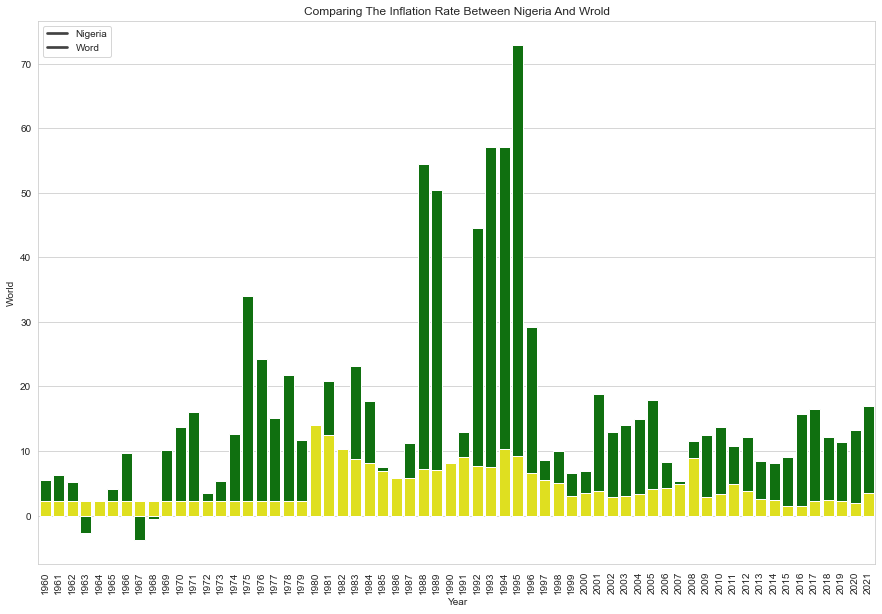

In [54]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=df1, x='Year', y='Nigeria', color='green')
sns.barplot(data=df1, x='Year', y='World', color='yellow')
plt.legend(['Nigeria','Word'], loc= 'upper left')
plt.title('Comparing The Inflation Rate Between Nigeria And Wrold')
plt.xticks(rotation='vertical')
plt.show();

It's actually clear that Nigeria has a very high inflation rate compare to World

**5. How does historical inflation compare to recent inflation rates**

In [58]:
'''convert to long form. Using the melt function to combine 'Nigeria', 'EU', 'USA', and 'World' columns into a variable
so I can compare the inflation rate of the columns over the years.

using var_name as a variable for the 4columns, and inserting their values as Value_name'''

cols = [['Nigeria', 'EU', 'USA', 'World']]
df2 = df1.melt('Year', var_name='cols', value_name='vals')

df2.head()

,Year,cols,vals
0,2021,Nigeria,16.95
1,2020,Nigeria,13.25
2,2019,Nigeria,11.40
3,2018,Nigeria,12.09
4,2017,Nigeria,16.52


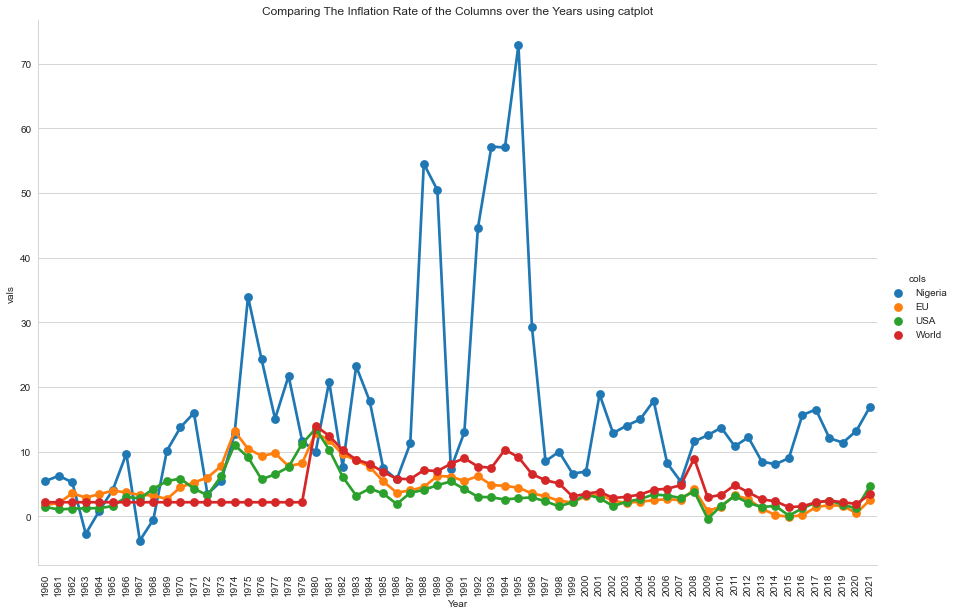

In [56]:
sns.catplot(x="Year", y="vals", hue='cols', data=df2, kind='point', height=8.27, aspect=12/8)
plt.title('Comparing The Inflation Rate of the Columns over the Years using catplot')
plt.xticks(rotation='vertical');

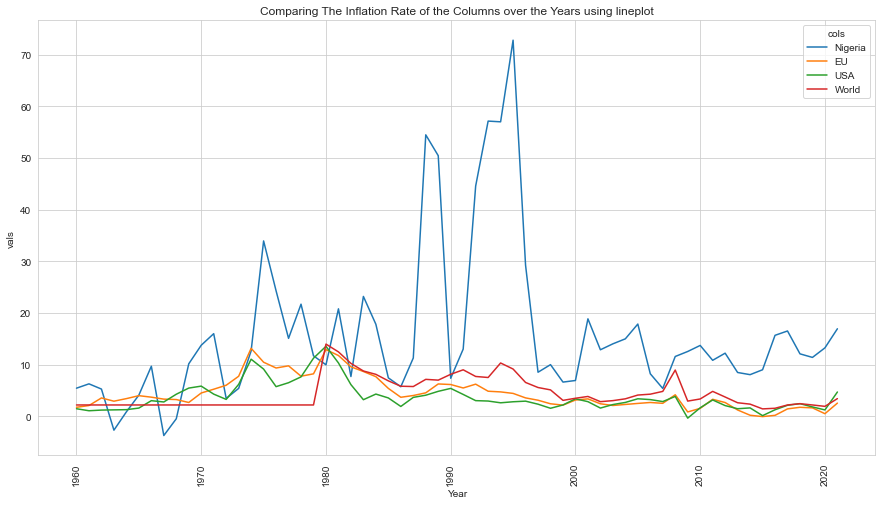

In [46]:
plt.figure(figsize=(15,8))
sns.lineplot(x="Year", y="vals", hue='cols', data=df2)
plt.title('Comparing The Inflation Rate of the Columns over the Years using lineplot')
plt.xticks(rotation='vertical');

#### OBSERVATON
These shows that inflation rate in Nigeria is higher than other. And it has especially gone very high in 1995 which is the highest recorded. Though we have recorded a rate below 0 in 1963%, 1967% and 1968% with -2.69%, -3.73%, and -0.48 respectively. 
The World inflation rate has been stable between 1960 to 179% at 2.19%. Though went up to 13.98% in 1980 which has been the highest recorded. 
USA has the best control over inflation rate compared to other countries here. Though they were also affected in 1980 when the had their highest inflation rate of 13.55%, which quickly went down to 3.21% in 1983.